# Polynomial Regression Exercise
Get some practice implementing polynomial regression in this exercise. In data.csv, you can see data generated for one predictor feature ('Var_X') and one outcome feature ('Var_Y'), following a non-linear trend. Use sklearn's `PolynomialFeatures class` to extend the predictor feature column into multiple columns with polynomial features. Play around with different degrees of polynomial.

Perform the following steps below:
## 1. Load in the data

The data is in the file called 'data.csv'. Note that this data has a header line.
Make sure that you've split out the data into the predictor feature in X and outcome feature in y.
For X, make sure it is in a 2-d array of 20 rows by 1 column. You might need to use NumPy's reshape function to accomplish this. Note that PolynomialFeatures is in the preprocessing module.

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Assign the data to predictor and outcome variables
train_data = pd.read_csv('Poly_data.csv')
X = train_data['Var_X'].values.reshape(-1, 1)
y = train_data['Var_Y'].values
print(type(X), X.shape)
print(type(y), y.shape)

# Reshape is required to convert the X into a 2D array. -1 means stay same, 1 means add
X = train_data['Var_X'].values.reshape(-1, 1)
print(type(X), X.shape)

<class 'numpy.ndarray'> (20, 1)
<class 'numpy.ndarray'> (20,)
<class 'numpy.ndarray'> (20, 1)


## 2. Create polynomial features

Create an instance of sklearn's `PolynomialFeatures class` and assign it to the variable poly_feat. Pay attention to how to set the degree of features, since that will be how the exercise is evaluated.
Create the polynomial features by using the `PolynomialFeatures` object's `.fit_transform()` method. The "fit" side of the method considers how many features are needed in the output, and the "transform" side applies those considerations to the data provided to the method as an argument. Assign the new feature matrix to the X_poly variable. Note now that the X variable that contains the features has the original feature and now degree=4 more columns of features. The `.fit_transform()` creates the features. [scikit Lean PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [8]:
# Create a PolynomialFeatures object, then fit and transform the predictor feature
poly_feat = PolynomialFeatures(degree = 4)
X_poly = poly_feat.fit_transform(X)
print(X_poly.shape)

(20, 5)


## 3. Build a polynomial regression model

Create a polynomial regression model by combining sklearn's LinearRegression class with the polynomial features. Assign the fit model to poly_model.  In declaring the model, use fit_intercept as False to not try to cross the y-axis. Then fit the model using the X_poly feature matrix and the know outcome. This has become a multivariable linear regression where the new dimensions on the factors from the polynomial.

In [19]:
poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)

In [20]:
# Create a list of values to predict that is in ascending order
x_pred = np.arange(-3, 3, .5)
print(x_pred.shape)

# Convert them into polynomial matrices to be use with the model, Make sure x_pred is a matrix
X_pred = poly_feat.fit_transform(x_pred.reshape(-1,1))
print(X_pred.shape)

y_pred = poly_model.predict(X_pred)
print(y_pred.shape)

(12,)
(12, 5)
(12,)


Text(0, 0.5, 'y')

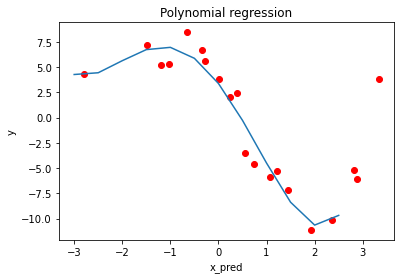

In [22]:
plt.scatter(X, y, color = 'red')
plt.plot(x_pred, y_pred)  # use x_pred and not X_pred since only one the value of x not the feature matrix
plt.title('Polynomial regression')
plt.xlabel('x_pred')
plt.ylabel('y')